In [0]:
##Check for uploaded data
dbutils.fs.ls("/FileStore/tables/")

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/2008_10-1.json', name='2008_10-1.json', size=17958, modificationTime=1645006073000),
 FileInfo(path='dbfs:/FileStore/tables/2008_10.json', name='2008_10.json', size=17958, modificationTime=1645006024000),
 FileInfo(path='dbfs:/FileStore/tables/2008_11-1.json', name='2008_11-1.json', size=69467, modificationTime=1645006074000),
 FileInfo(path='dbfs:/FileStore/tables/2008_11.json', name='2008_11.json', size=69467, modificationTime=1645006025000),
 FileInfo(path='dbfs:/FileStore/tables/2008_12-1.json', name='2008_12-1.json', size=64783, modificationTime=1645006060000),
 FileInfo(path='dbfs:/FileStore/tables/2008_12-2.json', name='2008_12-2.json', size=64783, modificationTime=1645006074000),
 FileInfo(path='dbfs:/FileStore/tables/2008_12.json', name='2008_12.json', size=64783, modificationTime=1645006025000),
 FileInfo(path='dbfs:/FileStore/tables/2009_01-1.json', name='2009_01-1.json', size=85111, modificationTime=1645006075000),
 FileInfo(pa

In [0]:
##Define a file variable to enable reusability of code
dataVar = 'clinicaltrial_2021_csv'

In [0]:
import os
os.environ['fileroot']= dataVar

In [0]:
##Renaming the file
filename ='clinicaltrial_2021.csv'

In [0]:
##Copy the file variable into the tmp folder
dbutils.fs.cp("/FileStore/tables/" + dataVar + '.gz', "file:/tmp")

Out[5]: True

In [0]:
%sh
ls /tmp/

Rserv
RtmpuETEzs
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2021_csv
clinicaltrial_2021_csv.gz
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
ipykernel-connection-ReplId-42bd6-4c6f8-e53d6-f.json
ipykernel-connection-ReplId-5456f-8444c-38110-0.json
ipykernel-connection-ReplId-70d87-6cb69-c246f-6.json
ipykernel-connection-ReplId-fed90-d5702-334e3.json
systemd-private-57e601c4e85d4d85a6e48189f560eea7-apache2.service-Ng5b0i
systemd-private-57e601c4e85d4d85a6e48189f560eea7-ntp.service-o3kzTg
systemd-private-57e601c4e85d4d85a6e48189f560eea7-systemd-logind.service-5AFooh
systemd-private-57e601c4e85d4d85a6e48189f560eea7-systemd-resolved.service-cFROjg
tmp.ghibnoYKZt


In [0]:
%sh
gunzip /tmp/$fileroot

gzip: /tmp/clinicaltrial_2021_csv: unknown suffix -- ignored


In [0]:
%sh
ls /tmp/

Rserv
RtmpuETEzs
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2021_csv
clinicaltrial_2021_csv.gz
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
ipykernel-connection-ReplId-42bd6-4c6f8-e53d6-f.json
ipykernel-connection-ReplId-5456f-8444c-38110-0.json
ipykernel-connection-ReplId-70d87-6cb69-c246f-6.json
ipykernel-connection-ReplId-fed90-d5702-334e3.json
systemd-private-57e601c4e85d4d85a6e48189f560eea7-apache2.service-Ng5b0i
systemd-private-57e601c4e85d4d85a6e48189f560eea7-ntp.service-o3kzTg
systemd-private-57e601c4e85d4d85a6e48189f560eea7-systemd-logind.service-5AFooh
systemd-private-57e601c4e85d4d85a6e48189f560eea7-systemd-resolved.service-cFROjg
tmp.ghibnoYKZt


In [0]:
##Rename file
filename ='clinicaltrial_2021.csv'

In [0]:
dbutils.fs.cp('file:/tmp/' + dataVar, '/FileStore/tables/' + filename)

Out[10]: True

In [0]:
dbutils.fs.ls('/FileStore/tables')

Out[11]: [FileInfo(path='dbfs:/FileStore/tables/2008_10-1.json', name='2008_10-1.json', size=17958, modificationTime=1645006073000),
 FileInfo(path='dbfs:/FileStore/tables/2008_10.json', name='2008_10.json', size=17958, modificationTime=1645006024000),
 FileInfo(path='dbfs:/FileStore/tables/2008_11-1.json', name='2008_11-1.json', size=69467, modificationTime=1645006074000),
 FileInfo(path='dbfs:/FileStore/tables/2008_11.json', name='2008_11.json', size=69467, modificationTime=1645006025000),
 FileInfo(path='dbfs:/FileStore/tables/2008_12-1.json', name='2008_12-1.json', size=64783, modificationTime=1645006060000),
 FileInfo(path='dbfs:/FileStore/tables/2008_12-2.json', name='2008_12-2.json', size=64783, modificationTime=1645006074000),
 FileInfo(path='dbfs:/FileStore/tables/2008_12.json', name='2008_12.json', size=64783, modificationTime=1645006025000),
 FileInfo(path='dbfs:/FileStore/tables/2009_01-1.json', name='2009_01-1.json', size=85111, modificationTime=1645006075000),
 FileInfo(p

In [0]:
##Convert unzipped dataset to an RDD
clinicaltrial_2021 = sc.textFile('/FileStore/tables/' + filename)

In [0]:
clinicaltrial_2021.take(5)

Out[13]: ['Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions',
 'NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|']

In [0]:
##Create a Header Variable for the first row
header = clinicaltrial_2021.first()

In [0]:
##Filter out the Header
clinicaltrial_2021 = clinicaltrial_2021.filter(lambda x: x != header)

In [0]:
##Number of Studies in the 2021 clinical trial dataset
clinicaltrial_2021.distinct().count()

Out[16]: 387261

In [0]:
##Question 2
##Split the RDD
clinicaltrial_2021 = clinicaltrial_2021.map(lambda x: x.split("|"))

In [0]:
clinicaltrial_2021.take(10)

Out[18]: [['NCT02758028',
  'The University of Hong Kong',
  'Recruiting',
  'Aug 2005',
  'Nov 2021',
  'Interventional',
  'Apr 2016',
  '',
  ''],
 ['NCT02751957',
  'Duke University',
  'Completed',
  'Jul 2016',
  'Jul 2020',
  'Interventional',
  'Apr 2016',
  'Autistic Disorder,Autism Spectrum Disorder',
  ''],
 ['NCT02758483',
  'Universidade Federal do Rio de Janeiro',
  'Completed',
  'Mar 2017',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Diabetes Mellitus',
  ''],
 ['NCT02759848',
  'Istanbul Medeniyet University',
  'Completed',
  'Jan 2012',
  'Dec 2014',
  'Observational',
  'May 2016',
  'Tuberculosis,Lung Diseases,Pulmonary Disease',
  ''],
 ['NCT02758860',
  'University of Roma La Sapienza',
  'Active, not recruiting',
  'Jun 2016',
  'Sep 2020',
  'Observational [Patient Registry]',
  'Apr 2016',
  'Diverticular Diseases,Diverticulum,Diverticulosis',
  ''],
 ['NCT02757209',
  'Consorzio Futuro in Ricerca',
  'Completed',
  'Apr 2016',
  'Jan 2018',
  'Interven

In [0]:
##Extracting the types of studies and their frequencies 
extractRDD = clinicaltrial_2021.map(lambda y:y[5])

In [0]:
extractRDD.take(10)

Out[20]: ['Interventional',
 'Interventional',
 'Interventional',
 'Observational',
 'Observational [Patient Registry]',
 'Interventional',
 'Observational [Patient Registry]',
 'Interventional',
 'Interventional',
 'Interventional']

In [0]:
##Pair RDD to count the frequency
pairRDD = extractRDD.map(lambda c: (c,1))

In [0]:
pairRDD.take(10)

Out[22]: [('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Observational', 1),
 ('Observational [Patient Registry]', 1),
 ('Interventional', 1),
 ('Observational [Patient Registry]', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1)]

In [0]:
##Perform a reduceByKey
reducedRDD = pairRDD.reduceByKey(lambda x,y: x+y)

In [0]:
##Sum up the number of occurrences
reducedRDD.take(10)

Out[24]: [('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Interventional', 301472),
 ('Expanded Access', 69)]

In [0]:
##Interchange positions to enable sortByKey
reducedRDD2= reducedRDD.map(lambda x: (x[1], x[0]))

In [0]:
reducedRDD2.take(10)

Out[26]: [(77540, 'Observational'),
 (8180, 'Observational [Patient Registry]'),
 (301472, 'Interventional'),
 (69, 'Expanded Access')]

In [0]:
SortRDD=reducedRDD2.sortByKey(False)

In [0]:
##Sort in Descending Order
SortRDD.take(5)

Out[28]: [(301472, 'Interventional'),
 (77540, 'Observational'),
 (8180, 'Observational [Patient Registry]'),
 (69, 'Expanded Access')]

In [0]:
OutputRDD= SortRDD.map(lambda x: (x[1], x[0]))

In [0]:
OutputRDD.take(10)

Out[30]: [('Interventional', 301472),
 ('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Expanded Access', 69)]

In [0]:
#Question 3
#Extracting the top 5 conditions and their frequencies
conditionsRDD = clinicaltrial_2021.map(lambda y: y[7])

In [0]:
conditionsRDD.take(5)

Out[32]: ['',
 'Autistic Disorder,Autism Spectrum Disorder',
 'Diabetes Mellitus',
 'Tuberculosis,Lung Diseases,Pulmonary Disease',
 'Diverticular Diseases,Diverticulum,Diverticulosis']

In [0]:
#Remove Empty Column
conditionsRDD=conditionsRDD.filter(lambda x: x != '')

In [0]:
conditionsRDD.take(5)

Out[34]: ['Autistic Disorder,Autism Spectrum Disorder',
 'Diabetes Mellitus',
 'Tuberculosis,Lung Diseases,Pulmonary Disease',
 'Diverticular Diseases,Diverticulum,Diverticulosis',
 'Asthma']

In [0]:
#Split by Comma
splitRDD=conditionsRDD.flatMap(lambda x: x.split(","))

In [0]:
splitRDD.take(5)

Out[36]: ['Autistic Disorder',
 'Autism Spectrum Disorder',
 'Diabetes Mellitus',
 'Tuberculosis',
 'Lung Diseases']

In [0]:
##Pair RDD to count the frequency
pairRDD2 = splitRDD.map(lambda c: (c,1))

In [0]:
pairRDD2.take(5)

Out[38]: [('Autistic Disorder', 1),
 ('Autism Spectrum Disorder', 1),
 ('Diabetes Mellitus', 1),
 ('Tuberculosis', 1),
 ('Lung Diseases', 1)]

In [0]:
##Perform a reduceByKey
reducedRDD2 = pairRDD2.reduceByKey(lambda x,y: x+y)

In [0]:
reducedRDD2.take(5)

Out[40]: [('Autistic Disorder', 867),
 ('Autism Spectrum Disorder', 880),
 ('Tuberculosis', 1118),
 ('Diverticular Diseases', 65),
 ('Diverticulosis', 18)]

In [0]:
##Interchange positions to enable sortByKey
reducedRDD2= reducedRDD2.map(lambda x: (x[1], x[0]))

In [0]:
reducedRDD2.take(5)

Out[42]: [(867, 'Autistic Disorder'),
 (880, 'Autism Spectrum Disorder'),
 (1118, 'Tuberculosis'),
 (65, 'Diverticular Diseases'),
 (18, 'Diverticulosis')]

In [0]:
SortRDD2=reducedRDD2.sortByKey(False)

In [0]:
SortRDD2.take(5)

Out[44]: [(13389, 'Carcinoma'),
 (11080, 'Diabetes Mellitus'),
 (9371, 'Neoplasms'),
 (8640, 'Breast Neoplasms'),
 (8032, 'Syndrome')]

In [0]:
conditionsRDD5= SortRDD2.map(lambda x: (x[1], x[0]))

In [0]:
##Top 5 Conditions and their Frequencies
conditionsRDD5.take(5)

Out[46]: [('Carcinoma', 13389),
 ('Diabetes Mellitus', 11080),
 ('Neoplasms', 9371),
 ('Breast Neoplasms', 8640),
 ('Syndrome', 8032)]

In [0]:
##Question 4
##Convert the mesh dataset to an RDD
meshRDD = sc.textFile('/FileStore/tables/mesh.csv/')
meshRDD.take(5)

Out[47]: ['term,tree',
 'Calcimycin,D03.633.100.221.173',
 'A-23187,D03.633.100.221.173',
 'Temefos,D02.705.400.625.800',
 'Temefos,D02.705.539.345.800']

In [0]:
##Map Transformation to split Mesh list by separating the term and the tree
meshRDD1 = meshRDD.map(lambda y: y.split(','))
meshRDD1.take(5)

Out[48]: [['term', 'tree'],
 ['Calcimycin', 'D03.633.100.221.173'],
 ['A-23187', 'D03.633.100.221.173'],
 ['Temefos', 'D02.705.400.625.800'],
 ['Temefos', 'D02.705.539.345.800']]

In [0]:
##Map Transformation to split the heirarchy tree
meshRDD2 = meshRDD1.map(lambda y: (y[0],y[1].split('.')))
meshRDD2.take(5)

Out[49]: [('term', ['tree']),
 ('Calcimycin', ['D03', '633', '100', '221', '173']),
 ('A-23187', ['D03', '633', '100', '221', '173']),
 ('Temefos', ['D02', '705', '400', '625', '800']),
 ('Temefos', ['D02', '705', '539', '345', '800'])]

In [0]:
#Filter out the root from list
meshrootRDD=meshRDD2.map(lambda y: (y[0],y[1][0]))
meshrootRDD.take(5)

Out[50]: [('term', 'tree'),
 ('Calcimycin', 'D03'),
 ('A-23187', 'D03'),
 ('Temefos', 'D02'),
 ('Temefos', 'D02')]

In [0]:
##Map the Conditions to their Hierarchy codes by joining conditionsRDD to the Meshroot RDD
joinRDD=conditionsRDD5.join(meshrootRDD)

In [0]:
joinRDD.take(5)

Out[52]: [('Syndrome', (8032, 'C23')),
 ('Lymphoma', (5395, 'C04')),
 ('Lymphoma', (5395, 'C15')),
 ('Lymphoma', (5395, 'C20')),
 ('Infections', (5323, 'C01'))]

In [0]:
##Extract the value
extractrootRDD=joinRDD.map(lambda x: x[1])

In [0]:
extractrootRDD.take(5)

Out[54]: [(8032, 'C23'), (5395, 'C04'), (5395, 'C15'), (5395, 'C20'), (5323, 'C01')]

In [0]:
##Change Positions
extractrootRDD=extractrootRDD.map(lambda y: (y[1], y[0]))

In [0]:
extractrootRDD.take(5)

Out[56]: [('C23', 8032), ('C04', 5395), ('C15', 5395), ('C20', 5395), ('C01', 5323)]

In [0]:
##Reduce by Key
sumrootRDD=extractrootRDD.reduceByKey(lambda x,y: x+y)

In [0]:
sumrootRDD.take(5)

Out[58]: [('C15', 34571), ('C26', 20476), ('C09', 8842), ('C07', 11980), ('G11', 4396)]

In [0]:
##Change Positions
sumrootRDD=sumrootRDD.map(lambda y: (y[1], y[0]))

In [0]:
sumrootRDD.take(5)

Out[60]: [(34571, 'C15'), (20476, 'C26'), (8842, 'C09'), (11980, 'C07'), (4396, 'G11')]

In [0]:
##Sort By Key in Descending Order
sortRDD3=sumrootRDD.sortByKey(False)
sortRDD3.take(5)

Out[61]: [(143994, 'C04'),
 (136079, 'C23'),
 (106674, 'C01'),
 (94523, 'C14'),
 (92310, 'C10')]

In [0]:
##Top 5 Most Frequent roots
rootRDD=sortRDD3.map(lambda y: (y[1], y[0]))
rootRDD.take(5)

Out[62]: [('C04', 143994),
 ('C23', 136079),
 ('C01', 106674),
 ('C14', 94523),
 ('C10', 92310)]

In [0]:
##Question 5
##Convert pharma dataset to an RDD
pharmaRDD = sc.textFile('/FileStore/tables/pharma.csv/')
pharmaRDD.take(5)

Out[63]: ['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"',
 '"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the c

In [0]:
pharmaRDD=pharmaRDD.map(lambda y: y.replace('"',''))
pharmaRDD.take(5)

Out[64]: ['Company,Parent_Company,Penalty_Amount,Subtraction_From_Penalty,Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting,Penalty_Year,Penalty_Date,Offense_Group,Primary_Offense,Secondary_Offense,Description,Level_of_Government,Action_Type,Agency,Civil/Criminal,Prosecution_Agreement,Court,Case_ID,Private_Litigation_Case_Title,Lawsuit_Resolution,Facility_State,City,Address,Zip,NAICS_Code,NAICS_Translation,HQ_Country_of_Parent,HQ_State_of_Parent,Ownership_Structure,Parent_Company_Stock_Ticker,Major_Industry_of_Parent,Specific_Industry_of_Parent,Info_Source,Notes',
 "Abbott Laboratories,Abbott Laboratories,$5,475,000,$0,$5,475,000,2013,20131227,government-contracting-related offenses,False Claims Act and related,kickbacks and bribery,Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid, biliary and peripheral vascular products.,federal,agency action,Justice

In [0]:
##Remove Header
headPharma = pharmaRDD.first()
pharmaRDD = pharmaRDD.filter(lambda x: x != headPharma)

In [0]:
pharmaRDD.take(5)

Out[66]: ["Abbott Laboratories,Abbott Laboratories,$5,475,000,$0,$5,475,000,2013,20131227,government-contracting-related offenses,False Claims Act and related,kickbacks and bribery,Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid, biliary and peripheral vascular products.,federal,agency action,Justice Department Civil Division,civil,,,,,,,,,,,,USA,Illinois,publicly traded,ABT,pharmaceuticals,pharmaceuticals,https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians,",
 "Abbott Laboratories Inc.,AbbVie,$1,500,000,000,$0,$1,500,000,000,2012,20120507,healthcare-related offenses,off-label or unapproved promotion of medical products,,Global Health Care Company Abbott Laboratories Inc. has pleaded guilty and agreed to pay $1.5 billion to resolve its criminal and civil liability arising from the company's u

In [0]:
##Split by Comma
splitPharmaRDD=pharmaRDD.map(lambda x: x.split(","))
splitPharmaRDD.take(5)

Out[67]: [['Abbott Laboratories',
  'Abbott Laboratories',
  '$5',
  '475',
  '000',
  '$0',
  '$5',
  '475',
  '000',
  '2013',
  '20131227',
  'government-contracting-related offenses',
  'False Claims Act and related',
  'kickbacks and bribery',
  "Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid",
  ' biliary and peripheral vascular products.',
  'federal',
  'agency action',
  'Justice Department Civil Division',
  'civil',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'USA',
  'Illinois',
  'publicly traded',
  'ABT',
  'pharmaceuticals',
  'pharmaceuticals',
  'https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians',
  ''],
 ['Abbott Laboratories Inc.',
  'AbbVie',
  '$1',
  '500',
  '000',
  '000',
  '$0',
  '$1',
  '500',
  '000',
  '000',
  '2012',
  '20120507',
  

In [0]:
##Extracting the parent company for the pharmaceutical companies
extractPharmaRDD = splitPharmaRDD.map(lambda y:y[1])
extractPharmaRDD.take(5)

Out[68]: ['Abbott Laboratories', 'AbbVie', 'AbbVie', ' Inc.', 'Johnson & Johnson']

In [0]:
FurtherPharmaRDD = splitPharmaRDD.map(lambda y:y[2])
FurtherPharmaRDD.take(5)

Out[69]: ['$5', '$1', '$126', 'Abbott Laboratories', '$18']

In [0]:
##Remove duplicate companies by using Distinct
distinctRDD=extractPharmaRDD.distinct()
distinctRDD.take(5)

Out[70]: ['Abbott Laboratories', 'AbbVie', ' LLC', 'AstraZeneca', 'Sanofi']

In [0]:
##Pair RDD
parentCompanyRDD=distinctRDD.map(lambda y: (y,1))
parentCompanyRDD.take(5)

Out[71]: [('Abbott Laboratories', 1),
 ('AbbVie', 1),
 (' LLC', 1),
 ('AstraZeneca', 1),
 ('Sanofi', 1)]

In [0]:
##Extract Sponsor from clinical trials into a new RDD
extractSponsorRDD = clinicaltrial_2021.map(lambda y:y[1])
extractSponsorRDD.take(5)

Out[72]: ['The University of Hong Kong',
 'Duke University',
 'Universidade Federal do Rio de Janeiro',
 'Istanbul Medeniyet University',
 'University of Roma La Sapienza']

In [0]:
pairSponsorRDD=extractSponsorRDD.map(lambda y: (y,1))
pairSponsorRDD.take(5)

Out[73]: [('The University of Hong Kong', 1),
 ('Duke University', 1),
 ('Universidade Federal do Rio de Janeiro', 1),
 ('Istanbul Medeniyet University', 1),
 ('University of Roma La Sapienza', 1)]

In [0]:
sumSponsorRDD = pairSponsorRDD.reduceByKey(lambda x, y: x+y)
sumSponsorRDD.take(5)

Out[74]: [('The University of Hong Kong', 757),
 ('Universidade Federal do Rio de Janeiro', 103),
 ('University of Roma La Sapienza', 289),
 ('Ankara University', 107),
 ('Ruijin Hospital', 200)]

In [0]:
notPharmaCompanyRDD=sumSponsorRDD.subtractByKey(parentCompanyRDD)
notPharmaCompanyRDD.take(5)

Out[75]: [('University of Roma La Sapienza', 289),
 ('Ruijin Hospital', 200),
 ('Washington University School of Medicine', 1374),
 ('Novo Nordisk A/S', 1081),
 ('Medicines for Malaria Venture', 55)]

In [0]:
##Interchange the positions to aid sortByKey
notPharmaCompanyRDD = notPharmaCompanyRDD.map(lambda y: (y[1],y[0]))
notPharmaCompanyRDD.take(5)

Out[76]: [(289, 'University of Roma La Sapienza'),
 (200, 'Ruijin Hospital'),
 (1374, 'Washington University School of Medicine'),
 (1081, 'Novo Nordisk A/S'),
 (55, 'Medicines for Malaria Venture')]

In [0]:
notPharmaCompanyRDD = notPharmaCompanyRDD.sortByKey(False)
notPharmaCompanyRDD.take(10)

Out[77]: [(3218, 'National Cancer Institute (NCI)'),
 (2414, 'M.D. Anderson Cancer Center'),
 (2369, 'Assistance Publique - Hôpitaux de Paris'),
 (2300, 'Mayo Clinic'),
 (2243, 'Merck Sharp & Dohme Corp.'),
 (2154, 'Assiut University'),
 (2088, 'Novartis Pharmaceuticals'),
 (1971, 'Massachusetts General Hospital'),
 (1928, 'Cairo University'),
 (1828, 'Hoffmann-La Roche')]

In [0]:
##The 10 Most Common Sponsors that are not Pharma Companies.
notPharmaCompanyRDD =notPharmaCompanyRDD.map(lambda x: (x[1],x[0]))
notPharmaCompanyRDD.take(10)

Out[78]: [('National Cancer Institute (NCI)', 3218),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088),
 ('Massachusetts General Hospital', 1971),
 ('Cairo University', 1928),
 ('Hoffmann-La Roche', 1828)]

In [0]:
##Question 6
##Defining a variable for the Year in reference, to aid resuability of code
Year='2021'

In [0]:
##Filter out the Completed Studies
CompletedRDD =clinicaltrial_2021.filter(lambda y: y[2]== 'Completed').map(lambda y: y[4])
CompletedRDD.take(5)

Out[80]: ['Jul 2020', 'Jan 2018', 'Dec 2014', 'Jan 2018', 'Jul 2017']

In [0]:
##Split by Space
CompletedRDD=CompletedRDD.map(lambda y: y.split(" "))
CompletedRDD.take(5)

Out[81]: [['Jul', '2020'],
 ['Jan', '2018'],
 ['Dec', '2014'],
 ['Jan', '2018'],
 ['Jul', '2017']]

In [0]:
##Filter out the year 2021
CompletedRDD=CompletedRDD.filter(lambda x: x[-1]==Year)
CompletedRDD.take(5)

Out[82]: [['Jan', '2021'],
 ['Jun', '2021'],
 ['Mar', '2021'],
 ['Jan', '2021'],
 ['May', '2021']]

In [0]:
##Create a pair rdd to count the unique months
CompletedRDD=CompletedRDD.map(lambda y: (y[0], 1))
CompletedRDD.take(5)

Out[83]: [('Jan', 1), ('Jun', 1), ('Mar', 1), ('Jan', 1), ('May', 1)]

In [0]:
##Sum up the number of completed studies for each month in 2021
CompletedRDD=CompletedRDD.reduceByKey(lambda x, y: x+y)
CompletedRDD.take(12)

Out[84]: [('May', 984),
 ('Jan', 1131),
 ('Jun', 1094),
 ('Mar', 1227),
 ('Feb', 934),
 ('Aug', 700),
 ('Apr', 967),
 ('Jul', 819),
 ('Oct', 187),
 ('Sep', 528)]

In [0]:
## Using a helper dictionary in python's calendar module to sort the months using the sortBy function
import calendar
d = {i:e for e,i in enumerate(calendar.month_abbr[1:],1)}

#{'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 
#'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [0]:
CompletedRDD1 = CompletedRDD.sortBy(keyfunc=lambda x: d.get(x[0]))

In [0]:
CompletedRDD1.take(20)

Out[87]: [('Jan', 1131),
 ('Feb', 934),
 ('Mar', 1227),
 ('Apr', 967),
 ('May', 984),
 ('Jun', 1094),
 ('Jul', 819),
 ('Aug', 700),
 ('Sep', 528),
 ('Oct', 187)]

Out[88]: Text(0.5, 1.0, 'Number of Completed Studies Per Month in 2021')

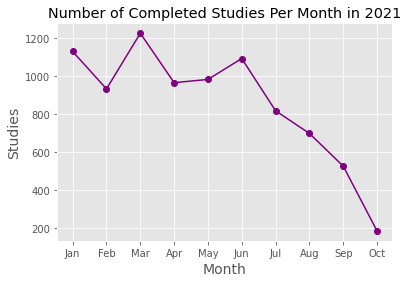

In [0]:
import matplotlib.pyplot as graph
##Convert RDD into a list
Month = CompletedRDD1.map(lambda y: y[0]).collect()
Studies = CompletedRDD1.map(lambda y: y[1]).collect()
graph.style.use('ggplot')
graph.xlabel('Month', fontsize=14)
graph.ylabel('Studies', fontsize=14)
graph.plot(Month,Studies, color ='purple', marker='o')
graph.grid(True)
graph.title('Number of Completed Studies Per Month in 2021')

In [0]:
CompletedRDD2= CompletedRDD.map(lambda x: (x[1], x[0]))
CompletedRDD2.take(5)

Out[89]: [(984, 'May'), (1131, 'Jan'), (1094, 'Jun'), (1227, 'Mar'), (934, 'Feb')]

In [0]:
CompletedRDD2 = CompletedRDD2.sortByKey(False)
CompletedRDD2.take(5)

Out[90]: [(1227, 'Mar'), (1131, 'Jan'), (1094, 'Jun'), (984, 'May'), (967, 'Apr')]

In [0]:
CompletedRDD2= CompletedRDD2.map(lambda x: (x[1], x[0]))
CompletedRDD2.take(10)

Out[91]: [('Mar', 1227),
 ('Jan', 1131),
 ('Jun', 1094),
 ('May', 984),
 ('Apr', 967),
 ('Feb', 934),
 ('Jul', 819),
 ('Aug', 700),
 ('Sep', 528),
 ('Oct', 187)]

Out[92]: Text(0.5, 1.0, 'Number of Completed Studies Per Month in 2021')

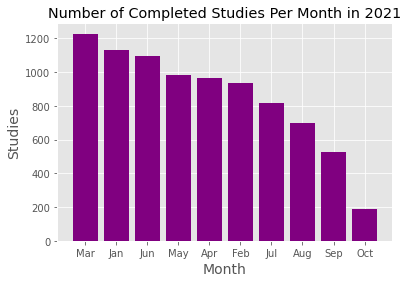

In [0]:
import matplotlib.pyplot as graph
##Convert RDD into a list
Month = CompletedRDD2.map(lambda y: y[0]).collect()
Studies = CompletedRDD2.map(lambda y: y[1]).collect()
graph.style.use('ggplot')
graph.xlabel('Month', fontsize=14)
graph.ylabel('Studies', fontsize=14)
graph.bar(Month,Studies, color ='purple')
graph.grid(True)
graph.title('Number of Completed Studies Per Month in 2021')

In [0]:
## Further Analysis 1
##To find the 10 Most Common Campanies that are Pharmaceutical Companies

In [0]:
##Join the SponsorRDD and the ParentCompany RDD
pharmaSponsorRDD=sumSponsorRDD.join(parentCompanyRDD)
pharmaSponsorRDD.take(5)

Out[94]: [('GlaxoSmithKline', (3378, 1)),
 ('Sanofi', (1274, 1)),
 ('AstraZeneca', (2691, 1)),
 ('Gilead Sciences', (563, 1)),
 ('Boehringer Ingelheim', (1967, 1))]

In [0]:
##Extract the Pharma Company and the number of trials
pharmaSponsorRDD=pharmaSponsorRDD.map(lambda y: (y[0],y[1][0]))
pharmaSponsorRDD.take(10)

Out[95]: [('GlaxoSmithKline', 3378),
 ('Sanofi', 1274),
 ('AstraZeneca', 2691),
 ('Gilead Sciences', 563),
 ('Boehringer Ingelheim', 1967),
 ('Amgen', 744),
 ('Bristol-Myers Squibb', 1171),
 ('Mallinckrodt', 86),
 ('Jazz Pharmaceuticals', 61),
 ('SciClone Pharmaceuticals', 10)]

In [0]:
##Interchange positions to enable sortByKey
pharmaSponsorRDD= pharmaSponsorRDD.map(lambda x: (x[1], x[0]))
pharmaSponsorRDD.take(5)

Out[96]: [(3378, 'GlaxoSmithKline'),
 (1274, 'Sanofi'),
 (2691, 'AstraZeneca'),
 (563, 'Gilead Sciences'),
 (1967, 'Boehringer Ingelheim')]

In [0]:
##Sort the Number of Trials by Key
pharmaSponsorRDD = pharmaSponsorRDD.sortByKey(False)
pharmaSponsorRDD.take(10)

Out[97]: [(3378, 'GlaxoSmithKline'),
 (2691, 'AstraZeneca'),
 (2645, 'Pfizer'),
 (1967, 'Boehringer Ingelheim'),
 (1274, 'Sanofi'),
 (1171, 'Bristol-Myers Squibb'),
 (744, 'Amgen'),
 (690, 'Novartis'),
 (563, 'Gilead Sciences'),
 (525, 'AbbVie')]

In [0]:
##Top 10 Most common Sponsors that are Pharmaceutical Companies
pharmaSponsorRDD=pharmaSponsorRDD.map(lambda x: (x[1], x[0]))
pharmaSponsorRDD.take(10)

Out[98]: [('GlaxoSmithKline', 3378),
 ('AstraZeneca', 2691),
 ('Pfizer', 2645),
 ('Boehringer Ingelheim', 1967),
 ('Sanofi', 1274),
 ('Bristol-Myers Squibb', 1171),
 ('Amgen', 744),
 ('Novartis', 690),
 ('Gilead Sciences', 563),
 ('AbbVie', 525)]

In [0]:
##Extracting the Interventions  and their frequencies 
interventionsRDD = clinicaltrial_2021.map(lambda y:y[8])
interventionsRDD.take(20)

Out[99]: ['',
 '',
 '',
 '',
 '',
 'Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate',
 '',
 '',
 'Vitamins',
 '',
 'Liraglutide,Xultophy',
 '',
 '',
 'Metformin,Empagliflozin,Linagliptin',
 '',
 '',
 '',
 '',
 '',
 '']

In [0]:
#Remove Empty Column
interventionsRDD1=interventionsRDD.filter(lambda x: x != '')
interventionsRDD1.take(10)

Out[100]: ['Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate',
 'Vitamins',
 'Liraglutide,Xultophy',
 'Metformin,Empagliflozin,Linagliptin',
 'Nitisinone',
 'Acetazolamide',
 'Bevacizumab,Erlotinib Hydrochloride',
 'Prednisone,Cyclophosphamide,Rituximab,Vincristine,Epirubicin',
 'Ketamine,Methohexital',
 'Micronutrients,Trace Elements']

In [0]:
#Split by Comma
interventionsRDD2=interventionsRDD1.flatMap(lambda x: x.split(","))
interventionsRDD2.take(10)

Out[101]: ['Fluticasone',
 'Xhance',
 'Budesonide',
 'Formoterol Fumarate',
 'Salmeterol Xinafoate',
 'Vitamins',
 'Liraglutide',
 'Xultophy',
 'Metformin',
 'Empagliflozin']

In [0]:
##Pair RDD to count the frequency
interventionsRDD3 = interventionsRDD2.map(lambda c: (c,1))
interventionsRDD3.take(5)

Out[102]: [('Fluticasone', 1),
 ('Xhance', 1),
 ('Budesonide', 1),
 ('Formoterol Fumarate', 1),
 ('Salmeterol Xinafoate', 1)]

In [0]:
##reduceByKey to sum up the Values
interventionsRDD4= interventionsRDD3.reduceByKey(lambda x,y: x+y)
interventionsRDD4.take(5)

Out[103]: [('Fluticasone', 554),
 ('Xhance', 422),
 ('Budesonide', 456),
 ('Xultophy', 27),
 ('Metformin', 1702)]

In [0]:
##Interchange positions to enable sortByKey
interventionsRDD4= interventionsRDD4.map(lambda x: (x[1], x[0]))
interventionsRDD4.take(5)

Out[104]: [(554, 'Fluticasone'),
 (422, 'Xhance'),
 (456, 'Budesonide'),
 (27, 'Xultophy'),
 (1702, 'Metformin')]

In [0]:
##sortByKey operayion to sort the values in descending order
interventionsRDD4 = interventionsRDD4.sortByKey(False)
interventionsRDD4.take(5)

Out[105]: [(3225, 'Paclitaxel'),
 (3012, 'Cyclophosphamide'),
 (2516, 'Dexamethasone'),
 (2392, 'Carboplatin'),
 (2335, 'Antibodies')]

In [0]:
##Top 10 Most Common Interventions
interventionsRDD5= interventionsRDD4.map(lambda x: (x[1], x[0]))
interventionsRDD5.take(10)

Out[106]: [('Paclitaxel', 3225),
 ('Cyclophosphamide', 3012),
 ('Dexamethasone', 2516),
 ('Carboplatin', 2392),
 ('Antibodies', 2335),
 ('Vaccines', 2214),
 ('Gemcitabine', 2195),
 ('Bevacizumab', 2005),
 ('Docetaxel', 1953),
 ('Rituximab', 1740)]